In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import opendatasets as od

od.download("https://www.kaggle.com/threnjen/2019-airline-delays-and-cancellations")

Skipping, found downloaded files in ".\2019-airline-delays-and-cancellations" (use force=True to force download)


In [48]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

df_jan = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_2020_01.csv')
df_feb = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_2020_02.csv')
df_mar = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_03.csv')
df_apr = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_04.csv')
df_may = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_05.csv')
df_jun = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_06.csv')
df_jul = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_07.csv')
df_aug = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_08.csv')
df_sep = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_09.csv')
df_oct = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_10.csv')
df_nov = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_11.csv')
df_dec = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/ONTIME_REPORTING_12.csv')

In [49]:
df_jan.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,19,7,WN,N7747C,2876,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",800,757.0,0.0,0.0,0800-0859,1050,1034.0,0.0,1000-1059,0.0,NaN,110.0,97.0,584.0,3,NaN,NaN,NaN,NaN,NaN,NaN
1,1,19,7,WN,N444WN,2901,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",2000,1955.0,0.0,0.0,2000-2059,2245,2245.0,0.0,2200-2259,0.0,NaN,105.0,110.0,584.0,3,NaN,NaN,NaN,NaN,NaN,NaN
2,1,19,7,WN,N259WN,2186,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1435,1429.0,0.0,0.0,1400-1459,1555,1545.0,0.0,1500-1559,0.0,NaN,80.0,76.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,19,7,WN,N908WN,2831,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1110,1116.0,6.0,0.0,1100-1159,1230,1230.0,0.0,1200-1259,0.0,NaN,80.0,74.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
4,1,19,7,WN,N414WN,2954,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",735,725.0,0.0,0.0,0700-0759,850,837.0,0.0,0800-0859,0.0,NaN,75.0,72.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
5,1,19,7,WN,N925WN,2989,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",905,901.0,0.0,0.0,0900-0959,1025,1013.0,0.0,1000-1059,0.0,NaN,80.0,72.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
6,1,19,7,WN,N262WN,3179,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",2000,2006.0,6.0,0.0,2000-2059,2120,2140.0,20.0,2100-2159,0.0,NaN,80.0,94.0,342.0,2,6.0,0.0,14.0,0.0,0.0,NaN
7,1,19,7,WN,N482WN,4093,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1905,2059.0,114.0,1.0,1900-1959,2025,2232.0,127.0,2000-2059,0.0,NaN,80.0,93.0,342.0,2,114.0,0.0,13.0,0.0,0.0,NaN
8,1,19,7,WN,N7851A,4461,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",2055,2102.0,7.0,0.0,2000-2059,2225,2233.0,8.0,2200-2259,0.0,NaN,90.0,91.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN
9,1,19,7,WN,N438WN,4925,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1800,1757.0,0.0,0.0,1800-1859,1920,1911.0,0.0,1900-1959,0.0,NaN,80.0,74.0,342.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_jan.groupby(['DEST_CITY_NAME', 'DEST_AIRPORT_ID']).size().reset_index(name='counts')

,DEST_CITY_NAME,DEST_AIRPORT_ID,counts
0,"Aberdeen, SD",10141,62
1,"Abilene, TX",10136,168
2,"Adak Island, AK",10165,9
3,"Aguadilla, PR",10732,193
4,"Akron, OH",10874,487
...,...,...,...
345,"Wilmington, NC",12323,574
346,"Worcester, MA",13933,118
347,"Wrangell, AK",15841,62
348,"Yakutat, AK",15991,60


In [51]:
len(df_jan['DEST_CITY_NAME'].unique())

343

In [52]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                607346 non-null  int64  
 1   DAY_OF_MONTH         607346 non-null  int64  
 2   DAY_OF_WEEK          607346 non-null  int64  
 3   OP_UNIQUE_CARRIER    607346 non-null  object 
 4   TAIL_NUM             606648 non-null  object 
 5   OP_CARRIER_FL_NUM    607346 non-null  int64  
 6   ORIGIN_AIRPORT_ID    607346 non-null  int64  
 7   ORIGIN               607346 non-null  object 
 8   ORIGIN_CITY_NAME     607346 non-null  object 
 9   DEST_AIRPORT_ID      607346 non-null  int64  
 10  DEST                 607346 non-null  object 
 11  DEST_CITY_NAME       607346 non-null  object 
 12  CRS_DEP_TIME         607346 non-null  int64  
 13  DEP_TIME             600682 non-null  float64
 14  DEP_DELAY_NEW        600647 non-null  float64
 15  DEP_DEL15        

In [53]:
df_jan = df_jan.drop(['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 32'], axis=1)

In [54]:
passengers = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/T3_AIR_CARRIER_SUMMARY_AIRPORT_ACTIVITY_2020.csv')
passengers.head()

,OP_UNIQUE_CARRIER,CARRIER_NAME,ORIGIN_AIRPORT_ID,SERVICE_CLASS,REV_ACRFT_DEP_PERF_510,REV_PAX_ENP_110
0,04Q,Tradewind Aviation,13535,K,20,105.0
1,04Q,Tradewind Aviation,15024,K,9,38.0
2,04Q,Tradewind Aviation,13987,K,1,2.0
3,04Q,Tradewind Aviation,14843,K,626,3553.0
4,04Q,Tradewind Aviation,12197,K,21,109.0


In [55]:
aircraft = pd.read_csv("2019-airline-delays-and-cancellations/raw_data/B43_AIRCRAFT_INVENTORY.csv", encoding='latin1')
aircraft.drop_duplicates(subset='TAIL_NUM', inplace=True)
aircraft.head()

,MANUFACTURE_YEAR,TAIL_NUM,NUMBER_OF_SEATS
0,1944,N54514,0.0
1,1945,N1651M,0.0
2,1953,N100CE,0.0
3,1953,N141FL,0.0
4,1953,N151FL,0.0


In [56]:
employees = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/P10_EMPLOYEES.csv')
employees = employees[['OP_UNIQUE_CARRIER', 'PASS_GEN_SVC_ADMIN', 'PASSENGER_HANDLING']]
employees = employees.groupby('OP_UNIQUE_CARRIER').sum().reset_index()
employees.head()

,OP_UNIQUE_CARRIER,PASS_GEN_SVC_ADMIN,PASSENGER_HANDLING
0,0WQ,19,0
1,1BQ,41,0
2,2HQ,24,0
3,3EQ,32,0
4,5V,0,0


In [57]:
employees.PASSENGER_HANDLING.value_counts()

0        33
296       1
17        1
9922      1
25893     1
12        1
2097      1
1425      1
5037      1
13841     1
1310      1
200       1
2579      1
21556     1
6127      1
1119      1
23        1
Name: PASSENGER_HANDLING, dtype: int64

In [58]:
weather_report = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/airport_weather_2019.csv')
weather_report.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/1/2019,4.70,NaN,0.14,0.0,0.0,64.0,66.0,57.0,310.0,310.0,15.0,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/2/2019,4.92,NaN,0.57,0.0,0.0,56.0,59.0,49.0,70.0,50.0,12.1,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/3/2019,5.37,NaN,0.15,0.0,0.0,52.0,55.0,51.0,340.0,330.0,15.0,18.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/4/2019,12.08,NaN,1.44,0.0,0.0,56.0,66.0,45.0,260.0,260.0,28.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,1/5/2019,13.42,NaN,0.00,0.0,0.0,49.0,59.0,44.0,280.0,330.0,23.9,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
weather_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38675 entries, 0 to 38674
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  38675 non-null  object 
 1   NAME     38675 non-null  object 
 2   DATE     38675 non-null  object 
 3   AWND     38294 non-null  float64
 4   PGTM     3938 non-null   float64
 5   PRCP     38649 non-null  float64
 6   SNOW     26907 non-null  float64
 7   SNWD     26385 non-null  float64
 8   TAVG     28742 non-null  float64
 9   TMAX     38655 non-null  float64
 10  TMIN     38654 non-null  float64
 11  WDF2     38305 non-null  float64
 12  WDF5     38194 non-null  float64
 13  WSF2     38305 non-null  float64
 14  WSF5     38194 non-null  float64
 15  WT01     13851 non-null  float64
 16  WT02     1810 non-null   float64
 17  WT03     4783 non-null   float64
 18  WT04     266 non-null    float64
 19  WT05     119 non-null    float64
 20  WT06     406 non-null    float64
 21  WT07     25 

In [60]:
weather_report.isna().sum() / len(weather_report) * 100

STATION     0.000000
NAME        0.000000
DATE        0.000000
AWND        0.985133
PGTM       89.817712
PRCP        0.067227
SNOW       30.427925
SNWD       31.777634
TAVG       25.683258
TMAX        0.051713
TMIN        0.054299
WDF2        0.956690
WDF5        1.243697
WSF2        0.956690
WSF5        1.243697
WT01       64.186167
WT02       95.319974
WT03       87.632838
WT04       99.312217
WT05       99.692308
WT06       98.950226
WT07       99.935359
WT08       87.782805
WT09       99.301875
WESD       99.984486
WT10       99.987072
PSUN       99.123465
TSUN       99.126050
SN32       99.056238
SX32       99.056238
TOBS       99.082094
WT11       99.997414
dtype: float64

In [61]:
cities = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/airports_list.csv')
cities.head()

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US"
1,10257,Albany International,"Albany, NY","ALBANY INTERNATIONAL AIRPORT, NY US"
2,10140,Albuquerque International Sunport,"Albuquerque, NM","ALBUQUERQUE INTERNATIONAL AIRPORT, NM US"
3,10299,Anchorage International,"Anchorage, AK","ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, A..."
4,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...


In [62]:
cities.loc[cities.ORIGIN_AIRPORT_ID == 14843]

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
68,14843,Puerto Rico International,"San Juan, PR","SAN JUAN L M MARIN INTERNATIONAL AIRPORT, US"


In [63]:
names = pd.read_csv('2019-airline-delays-and-cancellations/raw_data/CARRIER_DECODE.csv')
names.drop_duplicates(inplace=True)
names.drop_duplicates(subset=['OP_UNIQUE_CARRIER'], inplace=True)
names

,AIRLINE_ID,OP_UNIQUE_CARRIER,CARRIER_NAME
0,21754,2PQ,21 Air LLC
3,20342,Q5,40-Mile Air
4,20342,WRB,40-Mile Air
6,19627,CIQ,A/S Conair
7,19072,AAE,AAA Airlines
...,...,...,...
2702,20379,ZKQ,Zantop International
2706,19771,ZAQ,Zas Airline Of Egypt
2707,21118,37,Zeal 320
2708,22069,ZG,ZIPAIR Tokyo Inc.


In [64]:
weather_merge = pd.merge(cities, weather_report, how='left', on='NAME')
weather_merge.head()

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME,STATION,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-01,4.70,NaN,0.00,0.0,0.0,NaN,45.0,39.0,50.0,40.0,10.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-02,2.01,NaN,0.39,0.0,0.0,NaN,39.0,36.0,50.0,60.0,6.0,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-03,6.26,NaN,0.44,0.0,0.0,NaN,41.0,37.0,70.0,70.0,21.0,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-04,2.01,NaN,0.13,0.0,0.0,NaN,47.0,37.0,340.0,300.0,8.9,19.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12992,Adams Field,"Little Rock, AR","NORTH LITTLE ROCK AIRPORT, AR US",USW00003952,2019-01-05,1.79,NaN,0.00,0.0,0.0,NaN,62.0,37.0,290.0,300.0,6.9,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
weather = weather_merge[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WSF2', 'AWND', 'ORIGIN_AIRPORT_ID']]

In [66]:
weather.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992


In [67]:
weather.fillna(method='ffill')

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992
...,...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,35.0,26.0,320.0,12.1,5.82,10713
35021,2019-12-28,0.00,0.0,0.0,39.0,24.0,300.0,13.0,2.24,10713
35022,2019-12-29,0.04,0.1,0.0,32.0,28.0,150.0,12.1,6.26,10713
35023,2019-12-30,0.00,0.0,0.0,34.0,29.0,140.0,10.1,2.46,10713


In [68]:
weather.iloc[30080:30090]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
30080,6/14/2019,0.25,NaN,0.0,95.0,79.0,80.0,16.1,4.92,14635
30081,6/15/2019,0.76,NaN,0.0,96.0,77.0,150.0,21.9,4.47,14635
30082,6/16/2019,0.02,NaN,0.0,85.0,78.0,110.0,12.1,5.59,14635
30083,6/17/2019,0.65,NaN,0.0,90.0,78.0,220.0,21.0,6.26,14635
30084,6/18/2019,NaN,NaN,0.0,90.0,78.0,240.0,23.9,6.04,14635
30085,6/19/2019,NaN,NaN,0.0,NaN,NaN,230.0,21.0,7.61,14635
30086,6/20/2019,0.00,NaN,0.0,96.0,80.0,240.0,14.1,6.71,14635
30087,6/21/2019,0.00,NaN,0.0,96.0,NaN,340.0,12.1,2.91,14635
30088,6/22/2019,0.00,NaN,0.0,94.0,77.0,30.0,8.1,2.01,14635
30089,6/23/2019,0.00,NaN,0.0,95.0,78.0,250.0,14.1,3.58,14635


In [69]:
cities.loc[cities.ORIGIN_AIRPORT_ID == 14843]

,ORIGIN_AIRPORT_ID,DISPLAY_AIRPORT_NAME,ORIGIN_CITY_NAME,NAME
68,14843,Puerto Rico International,"San Juan, PR","SAN JUAN L M MARIN INTERNATIONAL AIRPORT, US"


In [70]:
weather = weather.drop([24807])

In [71]:
weather.loc[weather.SNOW.isna()]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID
4015,1/1/2019,0.00,NaN,NaN,53.0,41.0,240.0,28.0,5.82,11193
4016,1/2/2019,0.00,NaN,NaN,44.0,39.0,270.0,17.0,5.82,11193
4017,1/3/2019,0.00,NaN,NaN,43.0,31.0,280.0,15.0,3.80,11193
4018,1/4/2019,0.26,NaN,NaN,53.0,29.0,360.0,17.0,5.82,11193
4019,1/5/2019,0.00,NaN,NaN,52.0,35.0,220.0,14.1,6.93,11193
...,...,...,...,...,...,...,...,...,...,...
34655,2019-12-27,0.00,NaN,NaN,67.0,59.0,120.0,15.0,7.61,12191
34656,2019-12-28,0.03,NaN,NaN,78.0,63.0,170.0,23.9,11.41,12191
34657,2019-12-29,0.22,NaN,NaN,71.0,50.0,320.0,25.1,10.96,12191
34658,2019-12-30,0.00,NaN,NaN,63.0,42.0,340.0,17.0,6.49,12191


In [72]:
weather[['SNOW', 'SNWD']] = weather[['SNOW', 'SNWD']].fillna(0)

In [73]:
weather = weather.fillna(method='ffill')

In [74]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['MONTH'] = pd.DatetimeIndex(weather['DATE']).month
weather['DAY_OF_MONTH'] = pd.DatetimeIndex(weather['DATE']).day
weather

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WSF2,AWND,ORIGIN_AIRPORT_ID,MONTH,DAY_OF_MONTH
0,2019-01-01,0.00,0.0,0.0,45.0,39.0,50.0,10.1,4.70,12992,1,1
1,2019-01-02,0.39,0.0,0.0,39.0,36.0,50.0,6.0,2.01,12992,1,2
2,2019-01-03,0.44,0.0,0.0,41.0,37.0,70.0,21.0,6.26,12992,1,3
3,2019-01-04,0.13,0.0,0.0,47.0,37.0,340.0,8.9,2.01,12992,1,4
4,2019-01-05,0.00,0.0,0.0,62.0,37.0,290.0,6.9,1.79,12992,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
35020,2019-12-27,0.00,0.0,0.0,35.0,26.0,320.0,12.1,5.82,10713,12,27
35021,2019-12-28,0.00,0.0,0.0,39.0,24.0,300.0,13.0,2.24,10713,12,28
35022,2019-12-29,0.04,0.1,0.0,32.0,28.0,150.0,12.1,6.26,10713,12,29
35023,2019-12-30,0.00,0.0,0.0,34.0,29.0,140.0,10.1,2.46,10713,12,30


In [75]:
df_jan.drop(df_jan.loc[df_jan['DEP_TIME'].isna()].index, axis=0, inplace=True)
df_jan.drop(df_jan.loc[df_jan['ARR_DELAY_NEW'].isna()].index, axis=0, inplace=True)
df_jan.drop(df_jan.loc[df_jan['TAIL_NUM'].isna()].index, axis=0, inplace=True)
df_jan.drop(df_jan.loc[df_jan['CANCELLED']==1].index, axis=0, inplace=True)

In [76]:
df_jan["SEGMENT_NUMBER"] = df_jan.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)

In [77]:
df_jan = pd.merge(df_jan, names, how='left', on=['OP_UNIQUE_CARRIER'])

In [78]:
df_jan

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME
0,1,19,7,WN,N7747C,2876,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",800,757.0,0.0,0.0,0800-0859,1050,1034.0,0.0,1000-1059,0.0,110.0,97.0,584.0,3,2.0,19393,Southwest Airlines Co.
1,1,19,7,WN,N444WN,2901,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",2000,1955.0,0.0,0.0,2000-2059,2245,2245.0,0.0,2200-2259,0.0,105.0,110.0,584.0,3,8.0,19393,Southwest Airlines Co.
2,1,19,7,WN,N259WN,2186,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1435,1429.0,0.0,0.0,1400-1459,1555,1545.0,0.0,1500-1559,0.0,80.0,76.0,342.0,2,4.0,19393,Southwest Airlines Co.
3,1,19,7,WN,N908WN,2831,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",1110,1116.0,6.0,0.0,1100-1159,1230,1230.0,0.0,1200-1259,0.0,80.0,74.0,342.0,2,2.0,19393,Southwest Airlines Co.
4,1,19,7,WN,N414WN,2954,14831,SJC,"San Jose, CA",14908,SNA,"Santa Ana, CA",735,725.0,0.0,0.0,0700-0759,850,837.0,0.0,0800-0859,0.0,75.0,72.0,342.0,2,1.0,19393,Southwest Airlines Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599263,1,26,7,WN,N8654B,2497,11259,DAL,"Dallas, TX",11278,DCA,"Washington, DC",1635,1635.0,0.0,0.0,1600-1659,2015,2006.0,0.0,2000-2059,0.0,160.0,151.0,1184.0,5,3.0,19393,Southwest Airlines Co.
599264,1,26,7,WN,N243WN,2886,11259,DAL,"Dallas, TX",11278,DCA,"Washington, DC",2015,2016.0,1.0,0.0,2000-2059,2355,2347.0,0.0,2300-2359,0.0,160.0,151.0,1184.0,5,4.0,19393,Southwest Airlines Co.
599265,1,26,7,WN,N8502Z,3167,11259,DAL,"Dallas, TX",11278,DCA,"Washington, DC",1215,1227.0,12.0,0.0,1200-1259,1555,1559.0,4.0,1500-1559,0.0,160.0,152.0,1184.0,5,2.0,19393,Southwest Airlines Co.
599266,1,26,7,WN,N8614M,3902,11259,DAL,"Dallas, TX",11278,DCA,"Washington, DC",915,948.0,33.0,1.0,0900-0959,1305,1324.0,19.0,1300-1359,0.0,170.0,156.0,1184.0,5,2.0,19393,Southwest Airlines Co.


In [79]:
import regex as re
df_weather_merge = pd.merge(df_jan, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
weather = weather.rename(columns={'ORIGIN_AIRPORT_ID': 'DEST_AIRPORT_ID'})
df_weather_merge = pd.merge(df_weather_merge, weather, how='inner', on=['DEST_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
df_weather_merge



,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,DATE_x,PRCP_x,SNOW_x,SNWD_x,TMAX_x,TMIN_x,WDF2_x,WSF2_x,AWND_x,DATE_y,PRCP_y,SNOW_y,SNWD_y,TMAX_y,TMIN_y,WDF2_y,WSF2_y,AWND_y
0,1,19,7,WN,N7747C,2876,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",800,757.0,0.0,0.0,0800-0859,1050,1034.0,0.0,1000-1059,0.0,110.0,97.0,584.0,3,2.0,19393,Southwest Airlines Co.,2019-01-19,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,2019-01-19,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
1,1,19,7,WN,N444WN,2901,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",2000,1955.0,0.0,0.0,2000-2059,2245,2245.0,0.0,2200-2259,0.0,105.0,110.0,584.0,3,8.0,19393,Southwest Airlines Co.,2019-01-19,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,2019-01-19,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
2,1,19,7,DL,N115DU,668,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",1600,1549.0,0.0,0.0,1600-1659,1847,1822.0,0.0,1800-1859,0.0,107.0,93.0,584.0,3,3.0,19790,Delta Air Lines Inc.,2019-01-19,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,2019-01-19,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
3,1,19,7,DL,N389DA,818,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",615,612.0,0.0,0.0,0600-0659,909,856.0,0.0,0900-0959,0.0,114.0,104.0,584.0,3,1.0,19790,Delta Air Lines Inc.,2019-01-19,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,2019-01-19,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
4,1,19,7,DL,N104DU,1143,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",1328,1321.0,0.0,0.0,1300-1359,1616,1601.0,0.0,1600-1659,0.0,108.0,100.0,584.0,3,3.0,19790,Delta Air Lines Inc.,2019-01-19,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,2019-01-19,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482006,1,7,2,DL,N774DE,2855,14747,SEA,"Seattle, WA",10299,ANC,"Anchorage, AK",1135,1142.0,7.0,0.0,1100-1159,1426,1419.0,0.0,1400-1459,0.0,231.0,217.0,1448.0,6,2.0,19790,Delta Air Lines Inc.,2019-01-07,0.00,0.0,0.0,45.0,37.0,190.0,18.1,10.07,2019-01-07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482007,1,7,2,AS,N462AS,125,14057,PDX,"Portland, OR",10299,ANC,"Anchorage, AK",2045,2036.0,0.0,0.0,2000-2059,2339,2333.0,0.0,2300-2359,0.0,234.0,237.0,1542.0,7,3.0,19930,Alaska Airlines Inc.,2019-01-07,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,2019-01-07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482008,1,7,2,AS,N274AK,131,14057,PDX,"Portland, OR",10299,ANC,"Anchorage, AK",1230,1226.0,0.0,0.0,1200-1259,1525,1519.0,0.0,1500-1559,0.0,235.0,233.0,1542.0,7,2.0,19930,Alaska Airlines Inc.,2019-01-07,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,2019-01-07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482009,1,7,2,AS,N487AS,871,12173,HNL,"Honolulu, HI",10299,ANC,"Anchorage, AK",2150,2222.0,32.0,1.0,2100-2159,455,539.0,44.0,0001-0559,0.0,365.0,377.0,2777.0,11,4.0,19930,Alaska Airlines Inc.,2019-01-07,0.21,0.0,0.0,60.0,51.0,60.0,17.0,7.83,2019-01-07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24


In [80]:
df_weather_merge.drop(['DATE_x', 'DATE_y'], axis=1, inplace=True)
df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_x','_DEP', x))
df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_y','_ARR', x))
df_weather_merge

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR
0,1,19,7,WN,N7747C,2876,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",800,757.0,0.0,0.0,0800-0859,1050,1034.0,0.0,1000-1059,0.0,110.0,97.0,584.0,3,2.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
1,1,19,7,WN,N444WN,2901,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",2000,1955.0,0.0,0.0,2000-2059,2245,2245.0,0.0,2200-2259,0.0,105.0,110.0,584.0,3,8.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
2,1,19,7,DL,N115DU,668,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",1600,1549.0,0.0,0.0,1600-1659,1847,1822.0,0.0,1800-1859,0.0,107.0,93.0,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
3,1,19,7,DL,N389DA,818,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",615,612.0,0.0,0.0,0600-0659,909,856.0,0.0,0900-0959,0.0,114.0,104.0,584.0,3,1.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
4,1,19,7,DL,N104DU,1143,14831,SJC,"San Jose, CA",14869,SLC,"Salt Lake City, UT",1328,1321.0,0.0,0.0,1300-1359,1616,1601.0,0.0,1600-1659,0.0,108.0,100.0,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482006,1,7,2,DL,N774DE,2855,14747,SEA,"Seattle, WA",10299,ANC,"Anchorage, AK",1135,1142.0,7.0,0.0,1100-1159,1426,1419.0,0.0,1400-1459,0.0,231.0,217.0,1448.0,6,2.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,45.0,37.0,190.0,18.1,10.07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482007,1,7,2,AS,N462AS,125,14057,PDX,"Portland, OR",10299,ANC,"Anchorage, AK",2045,2036.0,0.0,0.0,2000-2059,2339,2333.0,0.0,2300-2359,0.0,234.0,237.0,1542.0,7,3.0,19930,Alaska Airlines Inc.,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482008,1,7,2,AS,N274AK,131,14057,PDX,"Portland, OR",10299,ANC,"Anchorage, AK",1230,1226.0,0.0,0.0,1200-1259,1525,1519.0,0.0,1500-1559,0.0,235.0,233.0,1542.0,7,2.0,19930,Alaska Airlines Inc.,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482009,1,7,2,AS,N487AS,871,12173,HNL,"Honolulu, HI",10299,ANC,"Anchorage, AK",2150,2222.0,32.0,1.0,2100-2159,455,539.0,44.0,0001-0559,0.0,365.0,377.0,2777.0,11,4.0,19930,Alaska Airlines Inc.,0.21,0.0,0.0,60.0,51.0,60.0,17.0,7.83,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24


In [81]:
df_jan = df_weather_merge
df_jan = df_jan.drop(columns = ['OP_UNIQUE_CARRIER', 'ORIGIN',  'DEST',
                        'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CANCELLED',
                        'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DEST_CITY_NAME',
                        'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN_CITY_NAME'],
                    axis=1)
df_jan

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR
0,1,19,7,14831,14869,757.0,0.0,0.0,0800-0859,1034.0,0.0,1000-1059,584.0,3,2.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
1,1,19,7,14831,14869,1955.0,0.0,0.0,2000-2059,2245.0,0.0,2200-2259,584.0,3,8.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
2,1,19,7,14831,14869,1549.0,0.0,0.0,1600-1659,1822.0,0.0,1800-1859,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
3,1,19,7,14831,14869,612.0,0.0,0.0,0600-0659,856.0,0.0,0900-0959,584.0,3,1.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
4,1,19,7,14831,14869,1321.0,0.0,0.0,1300-1359,1601.0,0.0,1600-1659,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482006,1,7,2,14747,10299,1142.0,7.0,0.0,1100-1159,1419.0,0.0,1400-1459,1448.0,6,2.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,45.0,37.0,190.0,18.1,10.07,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482007,1,7,2,14057,10299,2036.0,0.0,0.0,2000-2059,2333.0,0.0,2300-2359,1542.0,7,3.0,19930,Alaska Airlines Inc.,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482008,1,7,2,14057,10299,1226.0,0.0,0.0,1200-1259,1519.0,0.0,1500-1559,1542.0,7,2.0,19930,Alaska Airlines Inc.,0.00,0.0,0.0,48.0,37.0,220.0,13.0,4.03,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24
482009,1,7,2,12173,10299,2222.0,32.0,1.0,2100-2159,539.0,44.0,0001-0559,2777.0,11,4.0,19930,Alaska Airlines Inc.,0.21,0.0,0.0,60.0,51.0,60.0,17.0,7.83,0.0,0.0,11.0,8.0,-7.0,40.0,8.1,2.24


In [82]:
df_jan['ARR_DEL15'] = (df_jan.ARR_DELAY_NEW >= 15).astype(int)
df_jan.head(15)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
0,1,19,7,14831,14869,757.0,0.0,0.0,0800-0859,1034.0,0.0,1000-1059,584.0,3,2.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
1,1,19,7,14831,14869,1955.0,0.0,0.0,2000-2059,2245.0,0.0,2200-2259,584.0,3,8.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
2,1,19,7,14831,14869,1549.0,0.0,0.0,1600-1659,1822.0,0.0,1800-1859,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
3,1,19,7,14831,14869,612.0,0.0,0.0,0600-0659,856.0,0.0,0900-0959,584.0,3,1.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
4,1,19,7,14831,14869,1321.0,0.0,0.0,1300-1359,1601.0,0.0,1600-1659,584.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
5,1,19,7,14893,14869,1355.0,0.0,0.0,1300-1359,1620.0,0.0,1600-1659,532.0,3,4.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,64.0,52.0,160.0,8.9,4.25,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
6,1,19,7,14893,14869,1314.0,0.0,0.0,1300-1359,1548.0,0.0,1500-1559,532.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,64.0,52.0,160.0,8.9,4.25,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
7,1,19,7,14893,14869,1655.0,0.0,0.0,1600-1659,1927.0,0.0,1900-1959,532.0,3,2.0,20304,SkyWest Airlines Inc.,0.00,0.0,0.0,64.0,52.0,160.0,8.9,4.25,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
8,1,19,7,14893,14869,610.0,0.0,0.0,0600-0659,852.0,0.0,0800-0859,532.0,3,1.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,64.0,52.0,160.0,8.9,4.25,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
9,1,19,7,14908,14869,1307.0,0.0,0.0,1300-1359,1554.0,0.0,1600-1659,588.0,3,3.0,19790,Delta Air Lines Inc.,0.00,0.0,0.0,76.0,49.0,200.0,8.9,1.79,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0


In [83]:
df_jan = df_jan.rename(columns={'ORIGIN_AIRPORT_ID': 'DEP_AIRPORT_ID', 'DEST_AIRPORT_ID': 'ARR_AIRPORT_ID'})

Text(0, 0.5, 'Freq')

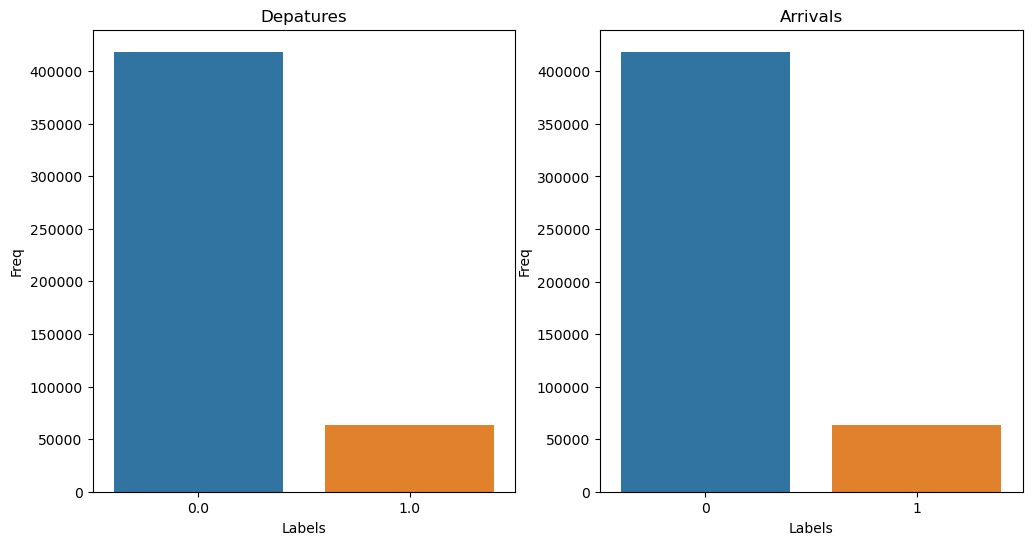

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(df_jan['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(df_jan['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

In [85]:
def timeToBlock(t):
    block="Nan"
    if(t> 0 and t< 600): block="0001-0559"
    if(t>559 and t< 700): block= "0600-0659"
    if(t>659 and t< 800): block= "0700-0759"
    if(t>759 and t< 900): block= "0800-0859"
    if(t>859 and t< 1000): block= "0900-0959"
    if(t>959 and t< 1100): block= "1000-1059"
    if(t>1059 and t< 1200): block= "1100-1159"
    if(t>1159 and t< 1300): block= "1200-1259"
    if(t>1259 and t< 1400): block= "1300-1359"
    if(t>1359 and t< 1500): block= "1400-1459"
    if(t>1459 and t< 1600): block= "1500-1559"
    if(t>1559 and t< 1700): block= "1600-1659"
    if(t>1659 and t< 1800): block="1700-1759"
    if(t>1759 and t< 1900): block= "1800-1859"
    if(t>1859 and t< 2000): block= "1900-1959"
    if(t>1959 and t< 2100): block= "2000-2059"
    if(t>2059 and t< 2200): block= "2100-2159"
    if(t>2159 and t< 2300): block= "2200-2259"
    if(t>2259 and t< 2400): block="2300-2359"
    return block

In [86]:
df_jan['ARR_TIME_BLK'] = df_jan['ARR_TIME'].apply(timeToBlock)
df_jan.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15
0,1,19,7,14831,14869,757.0,0.0,0.0,0800-0859,1034.0,0.0,1000-1059,584.0,3,2.0,19393,Southwest Airlines Co.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
1,1,19,7,14831,14869,1955.0,0.0,0.0,2000-2059,2245.0,0.0,2200-2259,584.0,3,8.0,19393,Southwest Airlines Co.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
2,1,19,7,14831,14869,1549.0,0.0,0.0,1600-1659,1822.0,0.0,1800-1859,584.0,3,3.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
3,1,19,7,14831,14869,612.0,0.0,0.0,0600-0659,856.0,0.0,0800-0859,584.0,3,1.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0
4,1,19,7,14831,14869,1321.0,0.0,0.0,1300-1359,1601.0,0.0,1600-1659,584.0,3,3.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0


In [87]:
delayArrPerTimeSlot = df_jan[['ARR_TIME_BLK', 'ARR_DEL15']].groupby(['ARR_TIME_BLK']).mean()
delayArrPerTimeSlot

,ARR_DEL15
ARR_TIME_BLK,
0001-0559,0.312754
0600-0659,0.066770
0700-0759,0.038973
0800-0859,0.049690
0900-0959,0.077396
1000-1059,0.093924
1100-1159,0.104811
1200-1259,0.108322
1300-1359,0.106000


In [88]:
def monthly_data_preprocess (df, cities, weather, names):
    df = df.drop(['CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 
                  'LATE_AIRCRAFT_DELAY', 'Unnamed: 32'], axis=1)
    
    df.drop(df.loc[df['DEP_TIME'].isna()].index, axis=0, inplace=True)
    df.drop(df.loc[df['ARR_DELAY_NEW'].isna()].index, axis=0, inplace=True)
    df.drop(df.loc[df['TAIL_NUM'].isna()].index, axis=0, inplace=True)
    df.drop(df.loc[df['CANCELLED']==1].index, axis=0, inplace=True)
    
    df["SEGMENT_NUMBER"] = df.groupby(["TAIL_NUM", 'DAY_OF_MONTH'])["DEP_TIME"].rank("dense", ascending=True)
    df = pd.merge(df, names, how='left', on=['OP_UNIQUE_CARRIER'])
    
    weather = weather.rename(columns={'DEST_AIRPORT_ID': 'ORIGIN_AIRPORT_ID'})
    df_weather_merge = pd.merge(df, weather, how='inner', on=['ORIGIN_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
    weather = weather.rename(columns={'ORIGIN_AIRPORT_ID': 'DEST_AIRPORT_ID'})
    df_weather_merge = pd.merge(df_weather_merge, weather, how='inner', on=['DEST_AIRPORT_ID', 'MONTH', 'DAY_OF_MONTH'])
    df_weather_merge = df_weather_merge.drop(columns=['DATE_x', 'DATE_y'])
    
    df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_x','_DEP', x))
    df_weather_merge = df_weather_merge.rename(columns=lambda x: re.sub('_y','_ARR', x))
    df = df_weather_merge
    
    df = df.drop(columns = ['OP_UNIQUE_CARRIER', 'ORIGIN',  'DEST',
                        'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CANCELLED',
                        'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DEST_CITY_NAME',
                        'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN_CITY_NAME'],
                    axis=1)
    
    df['ARR_DEL15'] = (df.ARR_DELAY_NEW >= 15).astype(int)
    df['ARR_TIME_BLK'] = df['ARR_TIME'].apply(timeToBlock)
    df = df.rename(columns={'ORIGIN_AIRPORT_ID': 'DEP_AIRPORT_ID', 'DEST_AIRPORT_ID': 'ARR_AIRPORT_ID'})
    
    return df

In [89]:
# df_jan = monthly_data_preprocess(df_jan, cities, weather, names)     already done in the cells above
df_feb = monthly_data_preprocess(df_feb, cities, weather, names)
df_mar = monthly_data_preprocess(df_mar, cities, weather, names)
df_apr = monthly_data_preprocess(df_apr, cities, weather, names)
df_may = monthly_data_preprocess(df_may, cities, weather, names)
df_jun = monthly_data_preprocess(df_jun, cities, weather, names)
df_jul = monthly_data_preprocess(df_jul, cities, weather, names)
df_aug = monthly_data_preprocess(df_aug, cities, weather, names)
df_sep = monthly_data_preprocess(df_sep, cities, weather, names)
df_oct = monthly_data_preprocess(df_oct, cities, weather, names)
df_nov = monthly_data_preprocess(df_nov, cities, weather, names)
df_dec = monthly_data_preprocess(df_dec, cities, weather, names)

In [90]:
annual_data = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]).reset_index(drop=True)

In [91]:
annual_data.shape

(5931063, 34)

In [92]:
del df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec

In [93]:
carrier_historical = pd.DataFrame(annual_data.groupby(['CARRIER_NAME', 'MONTH'])['ARR_DEL15'].mean().transpose().reset_index())
carrier_historical.rename(columns={'ARR_DEL15':'CARRIER_HISTORICAL'}, inplace=True)

In [94]:
dep_airport_historical = pd.DataFrame(annual_data.groupby(['DEP_AIRPORT_ID', 'MONTH'])['DEP_DEL15'].mean().transpose().reset_index())
dep_airport_historical.rename(columns={'DEP_DEL15':'DEP_AIRPORT_HIST'}, inplace=True)

In [95]:
arr_airport_historical = pd.DataFrame(annual_data.groupby(['ARR_AIRPORT_ID', 'MONTH'])['ARR_DEL15'].mean().transpose().reset_index())
arr_airport_historical.rename(columns={'ARR_DEL15':'ARR_AIRPORT_HIST'}, inplace=True)

In [96]:
day_historical = pd.DataFrame(annual_data.groupby(['DAY_OF_WEEK', 'MONTH'])['ARR_DEL15'].mean().transpose().reset_index())
day_historical.rename(columns={'ARR_DEL15':'DAY_HISTORICAL'}, inplace=True)

In [97]:
dep_block_lookup = pd.DataFrame(annual_data.groupby(['DEP_TIME_BLK', 'MONTH'])['DEP_DEL15'].mean().transpose().reset_index())
dep_block_lookup.rename(columns={'DEP_DEL15':'DEP_BLOCK_HIST'}, inplace=True)

In [98]:
arr_block_lookup = pd.DataFrame(annual_data.groupby(['ARR_TIME_BLK', 'MONTH'])['ARR_DEL15'].mean().transpose().reset_index())
arr_block_lookup.rename(columns={'ARR_DEL15':'ARR_BLOCK_HIST'}, inplace=True)

In [99]:
arr_block_lookup.head()

,ARR_TIME_BLK,MONTH,ARR_BLOCK_HIST
0,0001-0559,1,0.312754
1,0001-0559,2,0.343473
2,0001-0559,3,0.394880
3,0001-0559,4,0.464770
4,0001-0559,5,0.526884


In [100]:
annual_data = pd.merge(annual_data, carrier_historical, how='left')
annual_data = pd.merge(annual_data, dep_airport_historical, how='left')
annual_data = pd.merge(annual_data, arr_airport_historical, how='left')
annual_data = pd.merge(annual_data, day_historical, how='left')
annual_data = pd.merge(annual_data, dep_block_lookup, how='left')
annual_data = pd.merge(annual_data, arr_block_lookup, how='left')

annual_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
0,1,19,7,14831,14869,757.0,0.0,0.0,0800-0859,1034.0,0.0,1000-1059,584.0,3,2.0,19393,Southwest Airlines Co.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0,0.096188,0.084381,0.115632,0.129142,0.089470,0.093924
1,1,19,7,14831,14869,1955.0,0.0,0.0,2000-2059,2245.0,0.0,2200-2259,584.0,3,8.0,19393,Southwest Airlines Co.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0,0.096188,0.084381,0.115632,0.129142,0.174133,0.190358
2,1,19,7,14831,14869,1549.0,0.0,0.0,1600-1659,1822.0,0.0,1800-1859,584.0,3,3.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0,0.106534,0.084381,0.115632,0.129142,0.163672,0.142111
3,1,19,7,14831,14869,612.0,0.0,0.0,0600-0659,856.0,0.0,0800-0859,584.0,3,1.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0,0.106534,0.084381,0.115632,0.129142,0.053909,0.049690
4,1,19,7,14831,14869,1321.0,0.0,0.0,1300-1359,1601.0,0.0,1600-1659,584.0,3,3.0,19790,Delta Air Lines Inc.,0.0,0.0,0.0,69.0,49.0,320.0,10.1,3.36,0.0,0.0,0.0,43.0,29.0,140.0,16.1,8.72,0,0.106534,0.084381,0.115632,0.129142,0.142004,0.128724


In [ ]:
annual_data.to_csv('2019-airline-delays-and-cancellations/flights_table.csv', index=False)

In [101]:
annual_data.shape

(5931063, 40)

In [102]:
annual_sample = annual_data.sample(frac=0.2, replace=False, random_state=42)
annual_sample.shape

(1186213, 40)

In [103]:
annual_sample.to_csv('2019-airline-delays-and-cancellations/flights_table.csv', index=False)

In [66]:
annual_sample.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_AIRPORT_ID,ARR_AIRPORT_ID,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,DISTANCE,DISTANCE_GROUP,SEGMENT_NUMBER,AIRLINE_ID,CARRIER_NAME,PRCP_DEP,SNOW_DEP,SNWD_DEP,TMAX_DEP,TMIN_DEP,WDF2_DEP,WSF2_DEP,AWND_DEP,PRCP_ARR,SNOW_ARR,SNWD_ARR,TMAX_ARR,TMIN_ARR,WDF2_ARR,WSF2_ARR,AWND_ARR,ARR_DEL15,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,ARR_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,ARR_BLOCK_HIST
4273062,9,30,1,11057,11292,1615.0,0.0,0.0,1600-1659,1737.0,0.0,1700-1759,1337.0,6,4.0,19977,United Air Lines Inc.,0.00,0.0,0.0,91.0,70.0,70.0,12.1,5.82,0.00,0.0,0.0,76.0,50.0,30.0,25.1,11.41,0,0.167208,0.138449,0.143890,0.135100,0.179688,0.156900
3553637,8,30,5,13495,10821,1321.0,6.0,0.0,1300-1359,1640.0,0.0,1600-1659,998.0,4,3.0,19393,Southwest Airlines Co.,0.00,0.0,0.0,95.0,75.0,30.0,13.0,4.70,0.00,0.0,0.0,91.0,58.0,270.0,14.1,4.70,0,0.192353,0.163102,0.183021,0.212659,0.197496,0.179450
1126461,3,13,3,11057,11618,1309.0,84.0,1.0,1100-1159,1457.0,67.0,1400-1459,529.0,3,2.0,19805,American Airlines Inc.,0.00,0.0,0.0,66.0,34.0,170.0,14.1,5.59,0.00,0.0,0.0,47.0,28.0,130.0,14.1,5.14,1,0.189410,0.179731,0.265083,0.152191,0.165468,0.152607
5920847,12,13,5,11057,10257,2210.0,1.0,0.0,2200-2259,2350.0,0.0,2300-2359,646.0,3,2.0,19805,American Airlines Inc.,1.73,0.0,0.0,43.0,34.0,50.0,16.1,8.28,0.04,0.0,0.0,40.0,30.0,160.0,18.1,6.26,0,0.176659,0.182110,0.244121,0.190847,0.289847,0.304861
1361409,3,7,4,11057,10994,745.0,0.0,0.0,0700-0759,853.0,0.0,0800-0859,168.0,1,2.0,20417,Comair Inc.,0.00,0.0,0.0,54.0,28.0,120.0,13.0,5.37,0.00,0.0,0.0,63.0,31.0,170.0,15.0,3.80,0,0.171451,0.179731,0.170961,0.179561,0.086026,0.060502
